<a href="https://colab.research.google.com/github/rebomfim/MVP_MachineLearning_Analytics_PUC-Rio/blob/main/20250918_RenataDBPina_Machine_Learning_Analytics_(40530010056_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics (40530010056_20250_01)

**Nome:** Renata Dias Bomfim Pina

**Matrícula:** 4052024001635

**Dataset:** [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



# 1.Introdução

Conjunto de dados de Amostra - Telco Customer Churn (extraído do kaggle) - foi utilizado no MVP da disciplina anterior de *Análise de Dados e Boas Práticas (40530010055_20250_01)* da pós graduação em Ciência de Dados e Analytics da PUC-Rio.

Etapas de análise exploratória e algumas conclusões preliminares foram realizadas no MVP anterior (até o item 6), e alguns itens foram ajustados para ficarem adequados à proposta atual.

Para **MVP Machine Learning & Analytics** a partir do **item 7** exploramos os conceitos aprendidos nas disciplinas.

# 2.Descrição do Problema

Conjunto de dados de Amostra - Telco Customer Churn - é interessante para entender os padrões de comportamento que levam um cliente a cancelar ou manter seu contrato com operadora fictícia de Telecomunicações — especialmente no contexto de serviços contratados como voz e dados (banda larga fixa). Para investigar os motivos que levam ao churn, ou evasão de clientes, há atributos que auxiliam a caracterizar o perfil do cliente e seus serviços contratados.

O objetivo principal é segmentar clientes mais propensos ao cancelamento da assinatura com a operadora de Telecomunicações. Vale ressaltar que não são consideradas reclamações técnicas ou de atendimento, apenas dados comerciais.

## 2.1.Hipóteses do Problema

As hipóteses imaginadas no MVP passado se mantém para o atual, e são as seguintes:

- A velocidade de banda larga é um fator que fideliza o cliente? i.e. Fibra óptica (tende a alcançar velocidades alta) vs DSL (velocidade limitada).

- Clientes com muito tempo na base são mais propensos a se manterem fiéis?

- Clientes que pagam faturas mais altas são mais exigentes e trocam de operadora com mais facilidade?

- Algum serviço de valor agregado fideliza cliente?

- Algum tipo de método de pagamento faz sentido na escolha de fazer churn?

## 2.2.Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (dados de clientes e serviços contratados), com a informação se há ou não churn.

"Telco Customer Churn Dataset" é um conjunto de dados que **monitora a rotatividade de clientes de uma operadora de telecomunicações fictícia** com base em diversos fatores onde cada linha representa um cliente, cada coluna contém os atributos do cliente. Ideal para análise de retenção de clientes já que existe a informação de Churn (indicação se o cliente saiu ou não no último mês).

Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## 2.3.Atributos do Dataset

O dataset Telco Customer churn possui 7.043 amostras de clientes, com 21 atributos:

- ***Customer ID***	(ID único do cliente)
- ***gender***	(Se o cliente é homem ou mulher)
- ***SeniorCitizen***	(Se o cliente é idoso ou não (1, 0))
- ***Partner***	(Se o cliente tem um parceiro ou não (Sim, Não))
- ***Dependents***	(Se o cliente tem dependentes ou não (Sim, Não))
- ***tenure***	(Número de meses em que o cliente permaneceu na empresa)
- ***PhoneService***	(Se o cliente possui serviço telefônico ou não (Sim, Não))
- ***MultipleLines***	(Se o cliente possui várias linhas ou não (Sim, Não, Sem serviço telefônico))
- ***InternetService***	(Provedor de serviços de Internet do cliente (DSL, Fibra ótica, Não))
- ***OnlineSecurity***	(Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de internet))
- ***OnlineBackup***	(Se o cliente tem backup online ou não (Sim, Não, Sem serviço de internet))
- ***DeviceProtection***	(Se o cliente tem proteção do dispositivo ou não (Sim, Não, Sem serviço de internet))
- ***TechSupport***	(Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet))
- ***StreamingTV***	(Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de internet))
- ***StreamingMovies***	(Se o cliente tem filmes em streaming ou não (Sim, Não, Sem serviço de internet))
- ***Contract***	(O prazo do contrato do cliente (mês a mês, um ano, dois anos))
- ***PaperlessBilling***	(Se o cliente tem faturamento sem papel ou não (Sim, Não))
- ***PaymentMethod***	(Método de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária (automática), cartão de crédito (automático)))
- ***MonthlyCharges***	(O valor cobrado mensalmente ao cliente)
- ***TotalCharges***	(O valor total cobrado do cliente)
- ***Churn***	(Se o cliente desistiu ou não (Sim ou Não) no último mês)


# 3.Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, e machine learning.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # para padronização e normalização
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada > regressão
from sklearn.model_selection import StratifiedKFold # para preparar os folds da validação cruzada > classificação
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import  GridSearchCV # para executar o grid search
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo, matriz de confução, curva RoC, F1 score, Recall score, precisão
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.pipeline import Pipeline # para criar um pipeline de transformação e modelo
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score


# 4.Carga do Dataset

Carga de dataset contido no github `rebomfim`

In [ ]:
# Informa a URL de importação do dataset

url = "https://raw.githubusercontent.com/rebomfim/MVP_MachineLearning_Analytics_PUC-Rio/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Lê o arquivo
df_telco = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
display(df_telco.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 5.Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Telco customer churn, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 5.1.Total e Tipo das Instâncias

O dataset possui 7043 instâncias (clientes). A maioria das características dos clientes são de tipo categórico e  numérico (float e integer).

In [ ]:
print(f"Total de instâncias: {len(df_telco)}")
print("\nTipos de dados por coluna:")
print(df_telco.info())

Total de instâncias: 7043

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   o

Nota-se  que a coluna 'TotalCharges' não consta como numérica, sendo necessário fazer a conversão.
Foi utilizada a opção de tratar erros com a opção 'coerce' (se houver error de parse, força o valor para NaN)

In [ ]:
# Conversão 'TotalCharges' para float, forçando errors para NaN
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

Também é preciso converter a coluna 'SeniorCitizen' de object para bool

In [ ]:
# Conversão 'SeniorCitizen'
df_telco['SeniorCitizen'] = df_telco['SeniorCitizen'].astype(bool)

In [ ]:
# Verifica data type
print("\nTipos de dados por coluna após conversão:")
print(df_telco.info())


Tipos de dados por coluna após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

Após a conversão de Dtype 'object' para 'float' na coluna TotalCharges, a quantidade de linhas *non-null* passou de 7043 para 7032.

In [ ]:
 #exibindo a linha TotalCharges Nan
df_telco[df_telco['TotalCharges'].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Tratamento de Missings

Após converter a coluna de string para float, nota-se que há agora 7032 registros em 'TotalCharges' para de 7043 clientes: 11 registros NaN.

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df_telco.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_telco_customer = df_telco[col[:]]

In [ ]:
# substituindo os NaN de 'TotalCharges' por 0
df_telco_customer['TotalCharges'].fillna(0, inplace=True)

In [ ]:
# Verifica data type
print("\nTipos de dados por coluna após conversão:")
print(df_telco_customer.info())
df_telco_customer


Tipos de dados por coluna após conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## 5.2.Análise exploratória de dados

A partir da ocorrência de Churn Sim ou Não, é analisado o perfil do cliente.

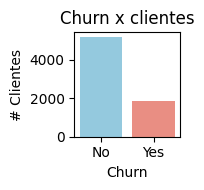

In [ ]:
# Criando gráfico de barra com 2 colunas com legenda Churn Yes/No

plt.figure(figsize=(2, 2))
g =sns.countplot(data=df_telco_customer, x="Churn", hue="Churn", palette=["skyblue", "salmon"])
plt.title('Churn x clientes')
plt.ylabel('# Clientes')
plt.tight_layout()
plt.show()

Uma hipótese levantada antes de analisamos os dados era "se a velocidade de banda larga é um fator de fideliza o cliente? i.e. Fibra óptica (tende a alcançar velocidades altas) vs DSL (velocidade limitada)".

In [ ]:
# Criando uma tabela dinâmica para verificar churn x InternetService
pivot_churn_internetService = pd.pivot_table(
    df_telco_customer, values='customerID', index='InternetService', columns='Churn', aggfunc='count',fill_value=0 ,margins=True)

print(pivot_churn_internetService)

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


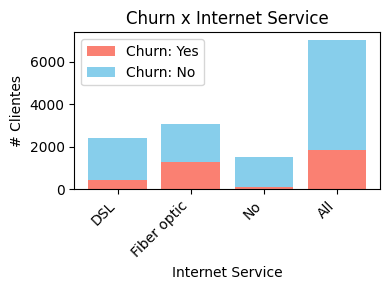

In [ ]:
# Criando o gráfico de barras Churn x Internet service
plt.figure(figsize=(4, 3))
plt.bar(pivot_churn_internetService.index, pivot_churn_internetService['Yes'], color='salmon', label='Churn: Yes')
plt.bar(pivot_churn_internetService.index, pivot_churn_internetService['No'], color='skyblue', label='Churn: No', bottom=pivot_churn_internetService['Yes'])


# Adicionando título e rótulos
plt.title('Churn x Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('# Clientes')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Exibindo o gráfico
plt.show()

E a resposta mostra ao contrário, clientes com serviço de Internet com velocidades mais altas (fiber optic) tendem mais ao churn quando comparados com os clientes com velocidades menores (DSL).

In [ ]:
# média dos atributos numéricos do dataset
df_telco_customer.describe().loc['mean']

,mean
tenure,32.371149
MonthlyCharges,64.761692
TotalCharges,2279.734304


Será que clientes com mais tempo na empresa independente do sexo são mais propensos a se manterem fiéis?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x Gender x tempo de serviço contratado (mês)
pivot_churn_tenure = pd.pivot_table(
    df_telco_customer, values='tenure', index='gender', columns='Churn', aggfunc='mean',fill_value=0 ,margins=True)

print(pivot_churn_tenure)

Churn          No        Yes        All
gender                                 
Female  37.858768  17.004260  32.244553
Male    37.289524  18.963441  32.495359
All     37.569965  17.979133  32.371149


Independente do sexo, cliente com menos tempo de serviço na empresa cancelaram o contrato.

Clientes com suporte técnico contratado são "fidelizados"?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x TechSupport
pivot_churn_TechSupport = pd.pivot_table(
    df_telco_customer, values='customerID', index='TechSupport', columns='Churn', aggfunc='count',fill_value=0 ,margins=True)

print(pivot_churn_TechSupport)

Churn                  No   Yes   All
TechSupport                          
No                   2027  1446  3473
No internet service  1413   113  1526
Yes                  1734   310  2044
All                  5174  1869  7043


Clientes com suporte técnico tendem a ficar com contrato ativo.

In [ ]:
# estatísticas descritivas básicas do dataset
df_telco_customer.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


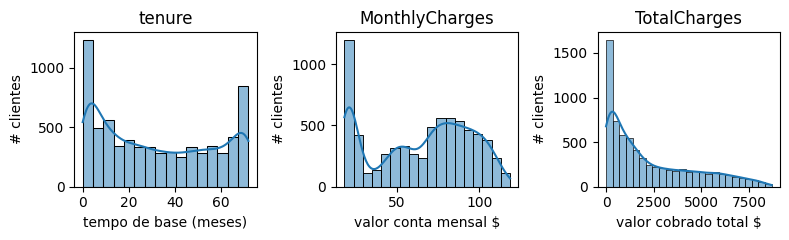

In [ ]:
# Gráficos histograma para colunas numéricas de 'tenure', 'MonthlyCharges' e'TotalCharges'.

plt.figure(figsize=(8, 2.5))

plt.subplot(1, 3, 1)
sns.histplot(df_telco_customer['tenure'], kde=True)
plt.title('tenure')
plt.xlabel('tempo de base (meses)')
plt.ylabel('# clientes')

plt.subplot(1, 3, 2)
sns.histplot(df_telco_customer['MonthlyCharges'], kde=True)
plt.title('MonthlyCharges')
plt.xlabel('valor conta mensal $')
plt.ylabel('# clientes')

plt.subplot(1, 3, 3)
sns.histplot(df_telco_customer['TotalCharges'], kde=True)
plt.title('TotalCharges')
plt.xlabel('valor cobrado total $')
plt.ylabel('# clientes')

plt.tight_layout()
plt.show()

Clientes com faturas mensais mais altas são mais exigentes e trocariam de operadora com mais facilidade?

In [ ]:
# Criando uma tabela dinâmica para verificar churn x MonthlyCharges
pivot_churn_MonthlyCharges = pd.pivot_table(
    df_telco_customer, values='MonthlyCharges',  columns='Churn', aggfunc='mean',fill_value=0 )

print(pivot_churn_MonthlyCharges)

Churn                  No        Yes
MonthlyCharges  61.265124  74.441332


Cliente que fizeram churn possuem uma média de cobrança mensal maior que a média dos clientes que não fizeram churn.

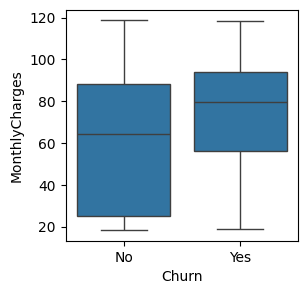

In [ ]:
# Boxplot do mensal cobrado x churn
plt.figure(figsize=(3, 3))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_telco_customer)
plt.show()

confirmando com o gráfico acima, clientes que pagam mais caro mensalmente tenderiam ao Churn.

Clientes que pagaram ao longo do tempo altas quantias na operadora de telecom trocariam de operadora com mais facilidade?

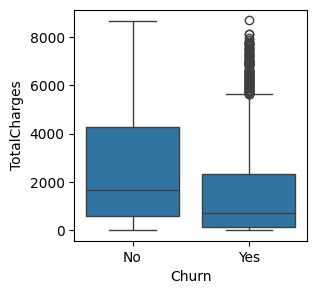

In [ ]:
# Boxplot do total cobrado x churn
plt.figure(figsize=(3, 3))
sns.boxplot(x='Churn', y='TotalCharges', data=df_telco_customer)
plt.show()

A média  de total cobrado de clientes que saíram no último mês, é menor que a média de todo valor cobrado do clientes que ficarm. A informação parece fazer sentido, pois foi verificado que clientes mais novos que tendem a sair da operadora.



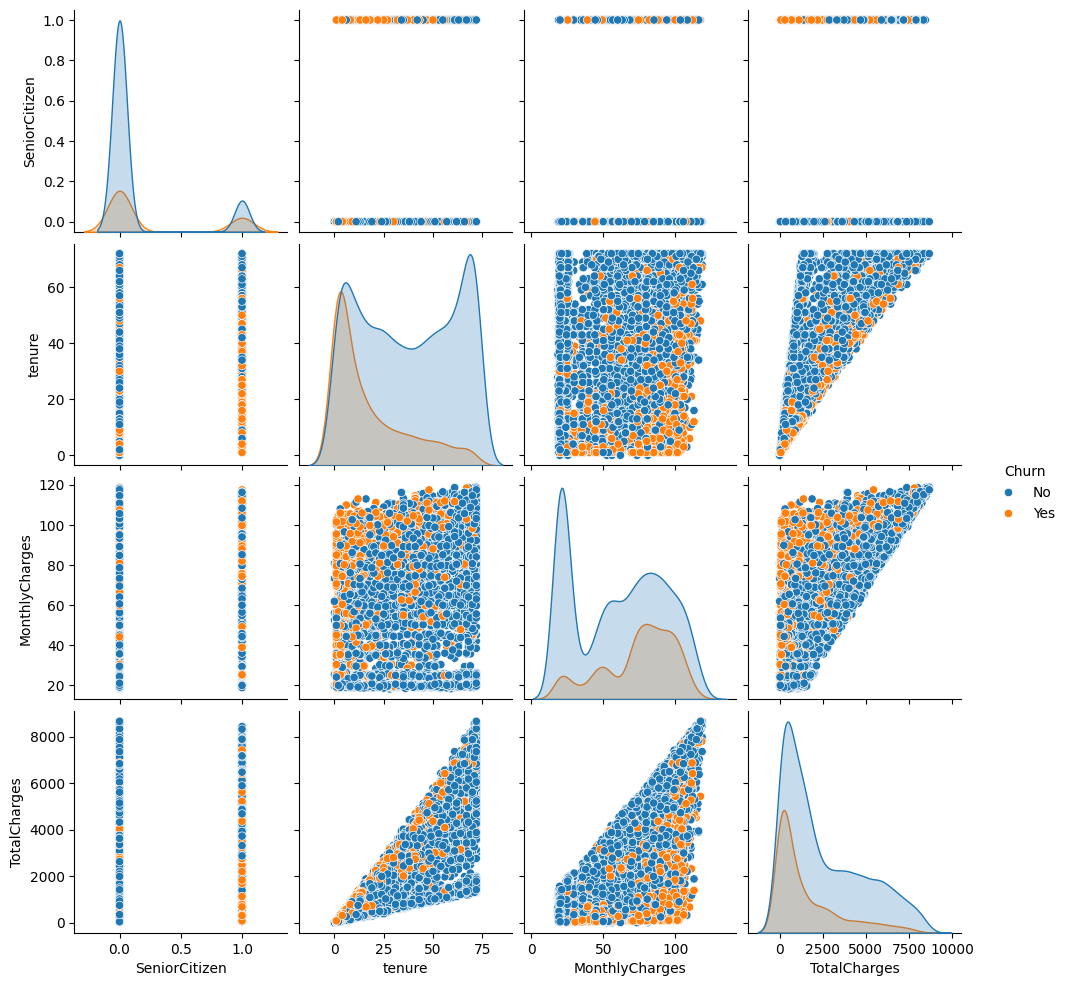

In [ ]:
sns.pairplot (df_telco_customer, hue='Churn')

Acima confirmamos por outro tipo de gráfico que clientes com menos tempo de serviço na empresa cancelaram mais o contrato. Assim como cliente que pagam mais mensalmente.

Outra informação interpretada foi que clientes mais idosos tenderam a fazer mais churn que clientes mais jovens.

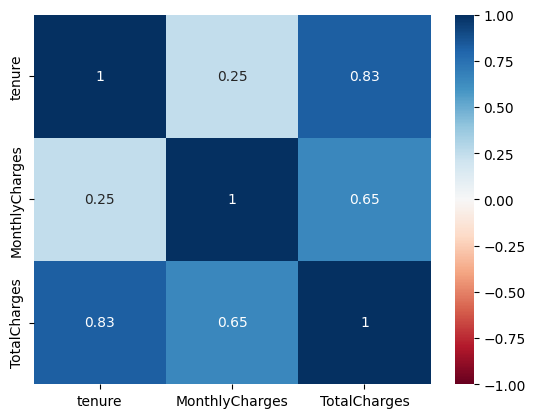

In [ ]:
# Selecionar apenas as colunas numéricas para o heatmap de correlação
numerical_df = df_telco_customer.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='RdBu',vmin = -1,vmax = 1)
plt.show()

Como já suposto antes, a correlação entre cobrança total e tempo de contrato (tenure) é alta.

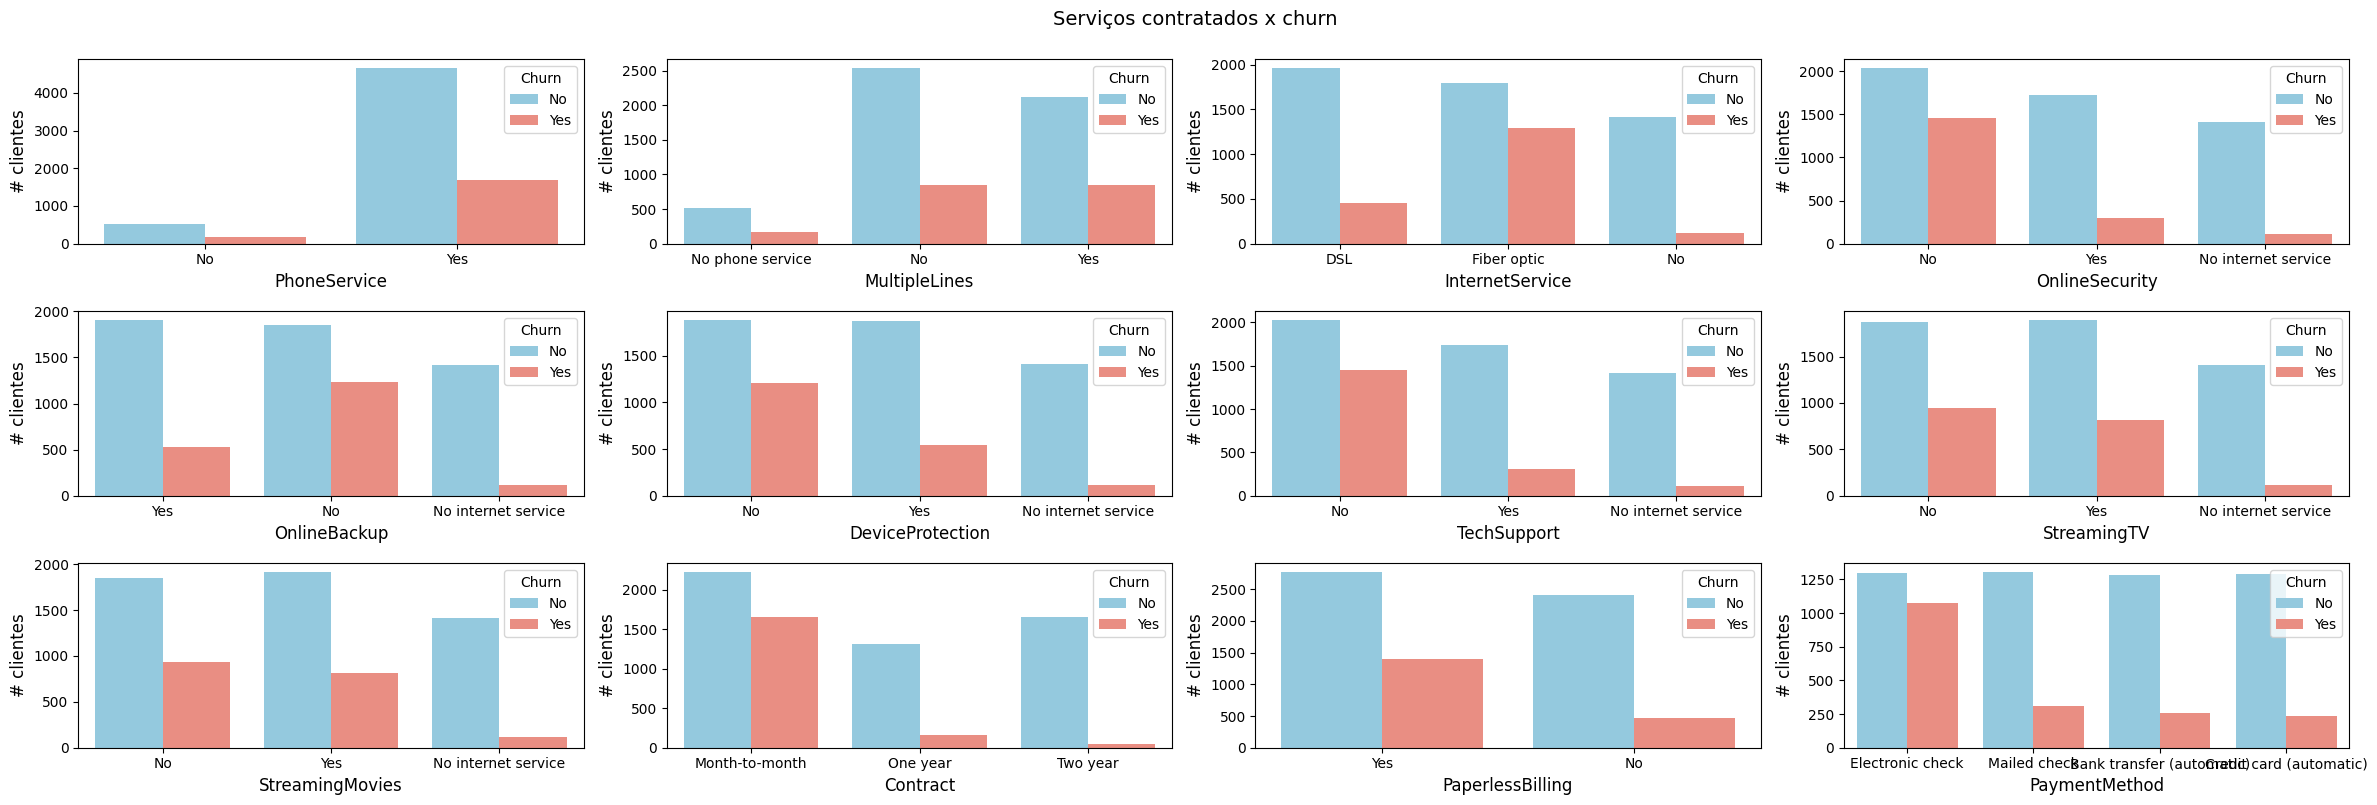

In [ ]:
# Lista de atributos categóricos para analisar com churn
servico_cliente_features = [ "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod" ]

# criando lista de cores
cores = ['skyblue','salmon']

# Criado 3 linhas e 4 colunas de gráficos (subplots)
fig, ax = plt.subplots(3, 4, figsize=(24,8))

# Atributos a exibir em 4 colunas de gráfico
for i, feature in enumerate(servico_cliente_features):
    row, col = divmod(i, 4)
    sns.countplot(x=feature, data=df_telco_customer, hue='Churn',
                  ax=ax[row, col], palette=cores)
    ax[row, col].set_xlabel(feature, fontsize=12)
    ax[row, col].set_ylabel('# clientes', fontsize=12)

# Criando título
fig.suptitle('Serviços contratados x churn', fontsize=14, y=1)

plt.tight_layout()
plt.show()

Percorrendo os gráficos, é possível concluir que clientes com serviço de segurança online, backup online, proteço de dispositivo, suporte técnico, tendem a manter contrato ativo com a operadora de telecomunicações.

Já clientes com contratos mensais, faturas sem papel e e método de pagamento de check eletrônico demonstram mais ocorrências de eventos de churn.

# 6.Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## 6.1.Tratamento de Valores Nulos

Apesar de tratamentos serem feitos na etapa de pré-processamento, esta etapa foi feita na etapa de análise de dados, no item "tratamento de missings", pois o dataframe quando foi carregado atribuiu *datatype* object para coluna numérica *TotalCharges* que originalmente possuía valores vazios.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df_telco_customer.isnull().sum()

Valores nulos no dataset:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 6.2.Transformação categórica: one-hot encoding e dummy encoding

Das operações de transformações categóricas o one-hot encoding e o dummy foram testados, mas o one-hot encoding foi aplicado. O número de colunas mudou de 21 para 49, com as mesmas 7043 linhas.

A opção de one-hot encoding (49 colunas) cria mais colunas que o dummy encoding (32 colunas), porém entendo que algumas colunas omitidas no dummy podem fazer falta para a análise final.

Optei por utilizar one-hot encoding e depois fazer feature selection.

In [ ]:
# One-hot encoding em colunas categóricas

# Lista de atributos categóricos para aplicar one-hot encoding
colunas_categoricas = [ "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn" ]

# Criando uma cópia do DataFrame para aplicar as transformações
df_telco_customer2 = df_telco_customer.copy()

# Aplicando one-hot encoding nas colunas categóricas
# Inicializando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # OneHotEncoder(sparse_output=False, drop='first') se aplicaria ao dummy
# Fit e transform colunas selecionadas
encoded_data = encoder.fit_transform(df_telco_customer2[colunas_categoricas])

# DataFrame para colunas encoded
df_telco_customer2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(colunas_categoricas))

# Combinando colunas encoded com o dataset original (excluding the original encoded columns)
# Assumindo que  'customerID' é a única coluna categórica que deve permanecer
coluna_original_permanacer = df_telco_customer.columns.difference(colunas_categoricas)
df_telco_cust_encoded = pd.concat([df_telco_customer[coluna_original_permanacer], df_telco_customer2], axis=1)

# Exibindo as primeiras linhas do DataFrame transformado
display(df_telco_cust_encoded.head())

# Verificando as novas colunas e o tipo de dados
print("\nTipos de dados por coluna após one-hot encoding:")
print(df_telco_cust_encoded.info())


,MonthlyCharges,TotalCharges,customerID,tenure,gender_Female,gender_Male,SeniorCitizen_False,SeniorCitizen_True,Partner_No,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,29.85,7590-VHVEG,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,56.95,1889.50,5575-GNVDE,34,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,53.85,108.15,3668-QPYBK,2,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,42.30,1840.75,7795-CFOCW,45,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,70.70,151.65,9237-HQITU,2,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0



Tipos de dados por coluna após one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7043 non-null   float64
 1   TotalCharges                             7043 non-null   float64
 2   customerID                               7043 non-null   object 
 3   tenure                                   7043 non-null   int64  
 4   gender_Female                            7043 non-null   float64
 5   gender_Male                              7043 non-null   float64
 6   SeniorCitizen_False                      7043 non-null   float64
 7   SeniorCitizen_True                       7043 non-null   float64
 8   Partner_No                               7043 non-null   float64
 9   Partner_Yes                              7043 non-null   float64
 10



Ressalto que a desvantagem do One-Hot encoding é a adição de colunas redundantes ao datasframe( i.e. "Partner_Yes" e "Partner_No"). Neste caso, deve-se atentar a dimensionalidade.

## 6.3.Outras Transformações e Etapas de Pré-Processamento: Feature selection

Com a utilização do one-hot encoding, algumas colunas ficaram redundantes, sendo assim algumas serão excluídas para melhorar a dimensionalidade.

Também é importante excluir a coluna 'TotalCharges' por possui alta correlação com 'Tenure', e pode causar um impacto na etapa de ML.

In [ ]:
# Removendo as colunas redundantes: 'gender_Female', 'SeniorCitizen_False', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No' e 'Churn_No'
# Removendo a coluna  com alta correlação: 'TotalCharges' por ter alta correlação com a coluna 'Tenure'
# Removendo a coluna customerID é string para a etapa de treinamento


df_telco_cust_encoded = df_telco_cust_encoded.drop(columns=['TotalCharges', 'customerID', 'gender_Female', 'SeniorCitizen_False','Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No','Churn_No'])
display(df_telco_cust_encoded.head())

,MonthlyCharges,tenure,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,56.95,34,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,53.85,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,42.30,45,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.70,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Exibindo as primeiras linhas do DataFrame transformado
display(df_telco_cust_encoded.head())

# Verificando as novas colunas e o tipo de dados
print("\nTipos de dados por coluna após one-hot encoding:")
print(df_telco_cust_encoded.info())

,MonthlyCharges,tenure,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,56.95,34,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,53.85,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,42.30,45,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.70,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0



Tipos de dados por coluna após one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7043 non-null   float64
 1   tenure                                   7043 non-null   int64  
 2   gender_Male                              7043 non-null   float64
 3   SeniorCitizen_True                       7043 non-null   float64
 4   Partner_Yes                              7043 non-null   float64
 5   Dependents_Yes                           7043 non-null   float64
 6   PhoneService_Yes                         7043 non-null   float64
 7   MultipleLines_No                         7043 non-null   float64
 8   MultipleLines_No phone service           7043 non-null   float64
 9   MultipleLines_Yes                        7043 non-null   float64
 10




---

---

# 7.Preparação dos dados

### Definição do target, variáveis e divisão dos dados

Particionamento em bases de treino e teste (Holdout) e validação cruzada apropriada ao problema (Ex: StratifiedKFold para classificação)


In [ ]:
# Separar features (X) e target (y)

array = df_telco_cust_encoded.values
X = array[:,0:39]
y = array[:,39]

In [ ]:
# Dividir os dados em conjuntos de treino e teste

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10 # número de folds da validação cruzada
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (5634, 39)
Dimensões de X_test: (1409, 39)
Dimensões de y_train: (5634,)
Dimensões de y_test: (1409,)


## 7.1.Feature Selection

Testei 3 técnicas para decidir quais atributos seriam mais relevanes no modelo:
**SelectKBest, Eliminação Recursiva de Atributos e ExtraTrees**.

Mas avaliando o resultado das 3 técnicas citadas, *não houve muita intersecção de atributos mais relevantes*.

**Na etapa pré-processamento alguns atributos redundantes e um atributo de alta correlação já haviam sido excluídos do modelo**.

⚠ *Optei por seguir sem excluir mais nenhum atributo*.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df_telco_cust_encoded.columns[0:39])

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df_telco_cust_encoded.columns[0:39]))


Número original de atributos: 39

Número reduzido de atributos: 5

Atributos Originais: Index(['MonthlyCharges', 'tenure', 'gender_Male', 'SeniorCitizen_True',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Pap

In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=5)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", df_telco_cust_encoded.columns[0:39])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=df_telco_cust_encoded.columns[0:39]))

Atributos Originais: Index(['MonthlyCharges', 'tenure', 'gender_Male', 'SeniorCitizen_True',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)'

In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", df_telco_cust_encoded.columns[0:39])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['MonthlyCharges', 'tenure', 'gender_Male', 'SeniorCitizen_True',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)

# 8.Modelagem e Inferência

## 8.1.Criação e avaliação de modelos: linha base

LR: 0.801206 (0.013140)
KNN: 0.764467 (0.012910)
CART: 0.720450 (0.023456)
NB: 0.683702 (0.014442)
SVM: 0.787712 (0.014865)
Bagging: 0.783630 (0.013175)
RF: 0.775825 (0.009778)
ET: 0.754524 (0.012410)
Ada: 0.796061 (0.011459)
GB: 0.795524 (0.011826)
Voting: 0.795703 (0.013456)
XGBoost: 0.774758 (0.009183)


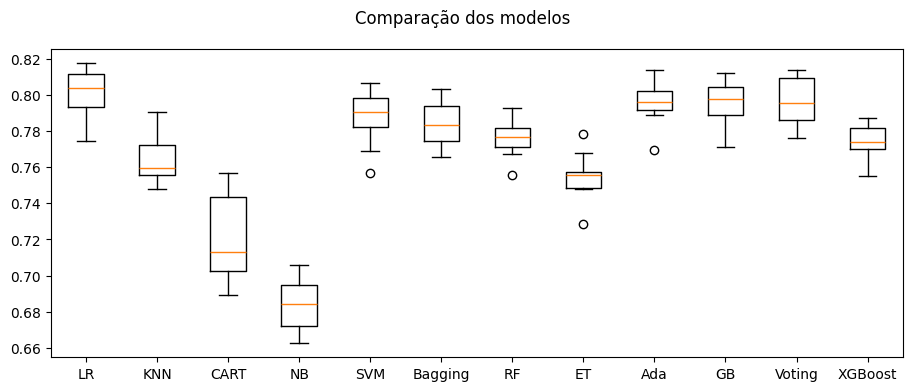

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))
models.append(('XGBoost', XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 7)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(11,4))
fig.suptitle('Comparação dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 8.2.Criação e avaliação de modelos: dados padronizados e normalizados

Analisando os modelos em baseline, verificamos que, considerando a acurácia média, o modelo treinado com o LogisticRegression apresentou os melhores resultados (80,12% de acurácia média e desvio-padrão de 1,31%), indicando grande chance de escolha deste algoritmo. Mas ainda construiremos um novo modelo, **com normalização e padronização.**

Para repetir esse processo, utilizarei a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original

A normalização e a padronização de dados são técnicas fundamentais em Machine Learning para preparar os dados antes de alimentar modelos. Essas abordagens ajudam a melhorar o desempenho dos modelos e garantem que características de diferentes escalas ou unidades sejam tratadas de forma equitativa.

LR-orig: 0.80121 (0.01314)
KNN-orig: 0.76447 (0.01291)
CART-orig: 0.72045 (0.02346)
NB-orig: 0.68370 (0.01444)
SVM-orig: 0.78771 (0.01487)
Bag-orig: 0.78363 (0.01317)
RF-orig: 0.77583 (0.00978)
ET-orig: 0.75452 (0.01241)
Ada-orig: 0.79606 (0.01146)
GB-orig: 0.79552 (0.01183)
Vot-orig: 0.79570 (0.01346)
XGBoost-orig: 0.77476 (0.00918)
LR-padr: 0.80085 (0.01306)
KNN-padr: 0.75275 (0.01225)
CART-padr: 0.72418 (0.02162)
NB-padr: 0.68370 (0.01444)
SVM-padr: 0.79340 (0.01075)
Bag-padr: 0.78310 (0.01494)
RF-padr: 0.78026 (0.01163)
ET-padr: 0.75559 (0.01659)
Ada-padr: 0.79606 (0.01146)
GB-padr: 0.79552 (0.01183)
Vot-padr: 0.79677 (0.01093)
XGBoost-padr: 0.77476 (0.00918)
LR-norm: 0.80138 (0.01335)
KNN-norm: 0.75453 (0.01485)
CART-norm: 0.72152 (0.02330)
NB-norm: 0.68370 (0.01444)
SVM-norm: 0.79091 (0.01168)
Bag-norm: 0.78026 (0.01508)
RF-norm: 0.77529 (0.00924)
ET-norm: 0.75470 (0.01467)
Ada-norm: 0.79606 (0.01146)
GB-norm: 0.79552 (0.01183)
Vot-norm: 0.79553 (0.01255)
XGBoost-norm: 0.77476 (0

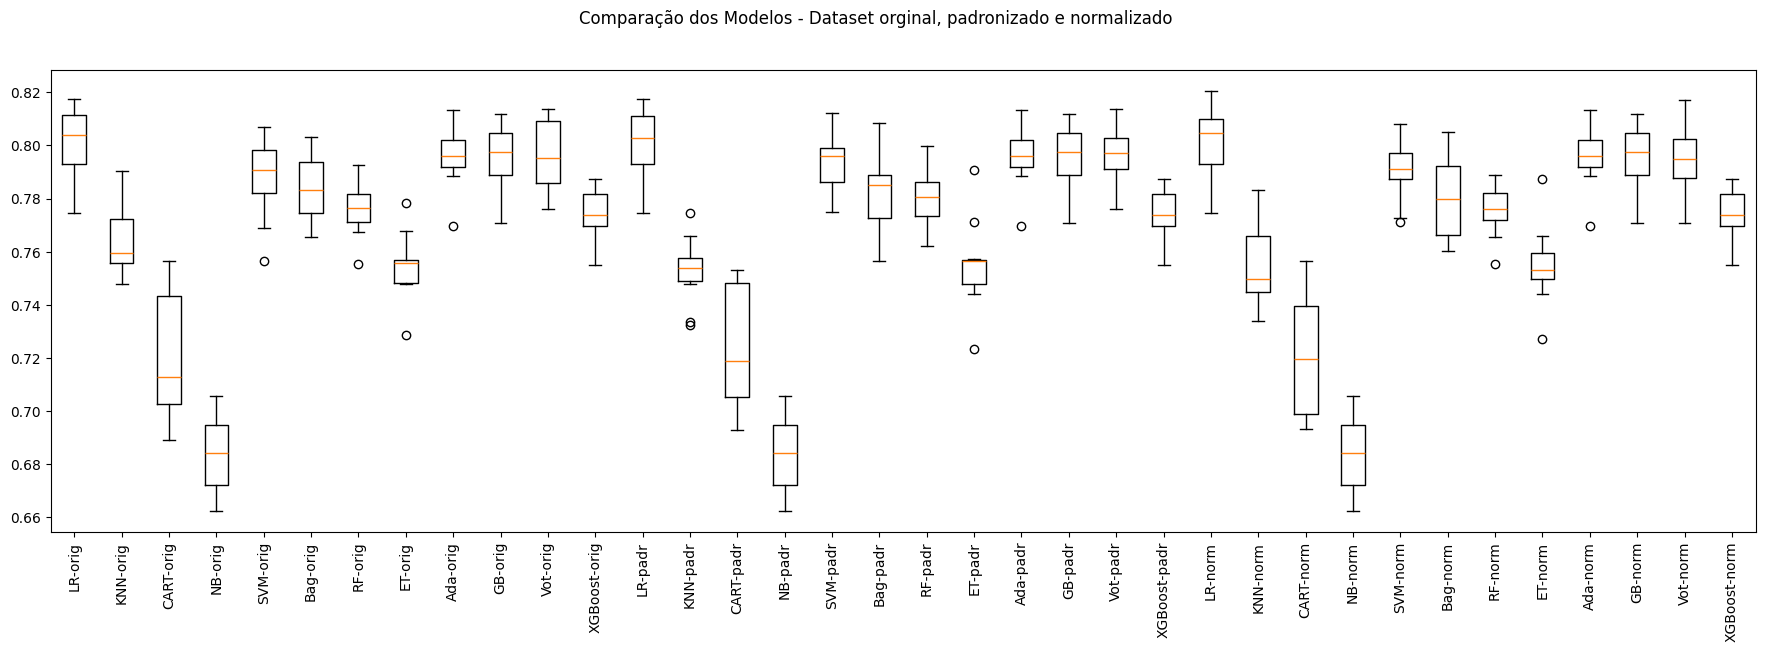

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Importando Pipeline
from sklearn.pipeline import Pipeline

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))
XGBClassifier = ('XGBoost', XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 7))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler()) # para Padronização
min_max_scaler = ('MinMaxScaler', MinMaxScaler()) # para Normalização


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))
pipelines.append(('XGBoost-orig', Pipeline([XGBClassifier])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))
pipelines.append(('XGBoost-padr', Pipeline([standard_scaler, XGBClassifier])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))
pipelines.append(('XGBoost-norm', Pipeline([min_max_scaler, XGBClassifier])))


# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 5 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(22,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Nesta nova rodada o algoritimo de regreção logística normalizado apresentou uma acurácia  (80,138% de acurácia média e desvio-padrão de 1,335%) discretamente melhor que regressão logística sem normalização  (80,121% de acurácia média e desvio-padrão de 1,314%)


## 8.3.Otimização dos hiperparâmetros

Otimização dos hiperparâmetros do algoritmo KNN e LR, a fim de buscar resultados ainda melhores.
KNN >> Foram utilizados todos os valores ímpares de k entre 1 e 21 e diferentes métricas de distância.
Regressão Logística >> teste de combinações de intensidade da regularização (C) em [0.001, 0.01, 0.1, 1, 10, 100], tipo de penalização (l1 "Lasso" ou l2 "Rigde"), para encontrar o melhor ajuste do modelo.

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.786120 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.775113 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 17}
Sem tratamento de missings: knn-norm - Melhor: 0.775828 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


Após a otimização dos hiperparâmetros do algoritmo KNN, o melhor resultado alcançado foi 78,61% de acurácia com métrica Manhattan e 15 vizinhos. Sendo assim regressão logística com os dados normalizados continua sendo modelo mais promissor (80,138% de acurácia média e desvio-padrão de 1,335%).

In [ ]:
# Tuning do LR

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
reg_log = ('LR', LogisticRegression(max_iter=200))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))

param_grid = {
    'LR__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'LR__penalty': ['l1', 'l2'],
    'LR__solver': ['liblinear']
}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: LR-orig - Melhor: 0.802093 usando {'LR__C': 1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Sem tratamento de missings: LR-padr - Melhor: 0.801915 usando {'LR__C': 1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Sem tratamento de missings: LR-norm - Melhor: 0.802093 usando {'LR__C': 100, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}


Após a otimização dos hiperparâmetros de Regressão Logística a acurácia fica em  80,2093% com 2 propostas com LR-orig com intensidade da regularização 1 e penalização Lasso ( C=1, e L1) e,  LR normalizado com intensidade da regularização 100 e penalização Rigde (C = 100 e L2).

## 8.4.Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8034066713981547


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

Com a avaliação com o conjunto de teste, a acurácia foi de 80,34% em dados não vistos. Esse resultado foi ainda melhor do que a avaliação anterior da regressão logística com normalização.

Valores semelhantes à acurácia de teste são esperados quando esse modelo estiver executando em produção e fazendo predições para novos dados.

# 9.Métricas de avaliação

### 9.1.Matriz de Confusão

In [ ]:
# Definindo os valores da matriz
dados = {
    'Previsão Positivo': ['VP', 'FP'],
    'Previsão Negativo': ['FN', 'VN']
}

# Índices são os valores reais
matriz_confusao = pd.DataFrame(dados, index=['Real Positivo', 'Real Negativo'])

print(matriz_confusao)


              Previsão Positivo Previsão Negativo
Real Positivo                VP                FN
Real Negativo                FP                VN


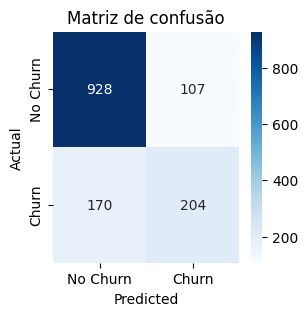

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusão')
plt.show()

Valores alcançados:

Verdadeiro Positivo (VP / TP) = 928
Falso Negativo (FN) = 107
Falso Positivo (FP) = 170
Verdadeiro Negativo (VN / TN) = 204
Total de amostras = 928 + 107 + 170 + 204 = 1409

A acurácia parece boa em ~80,4%, mas avaliando a Matriz de confusão é verificado que dataset é desbalanceado. Sendo assim, a acurácia sozinha não pode ser considerada.

In [ ]:
# Checando acurácia e relatório de classificação

print(f"Acurácia da Regressão logística normalizada: {accuracy_score(y_test, predictions):.5f}")
print()
print("Relatório de classificação para Regressão logística \n", classification_report(y_test, predictions))

Acurácia da Regressão logística normalizada: 0.80341

Relatório de classificação para Regressão logística 
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1035
         1.0       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



Regressão logística desempenhou melhor ao identificar os casos da classe 0.0 ( "não churn"), com bons valores de precisão, recall e f1-score. Já na classe 1.0 ("churn"), o desempenho foi mais fraco, com um f1-score de ~60%, indicando que o modelo tem mais dificuldade para prever quem realmente vai sair.

### 9.2.Curva RoC e AUC

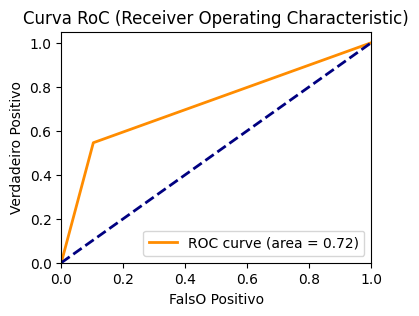

In [ ]:
# Avaliação com Curva ROC e métrica AUC (area under curve)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FalsO Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva RoC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

De acordo com a curva ROC, o resultado foi positivo, pois a curva se posiciona acima e à esquerda da linha pontilhada, que representa o acaso. Neste caso, o AUC de 0,72 indica um desempenho satisfatório do modelo.

## 9.3.Feature Importance

Análise de feature importance para entender quais variáveis (features) mais impactam a predição.

In [ ]:
# Obter as features dos dados de treino
feature_names = df_telco_cust_encoded.columns[:-1]

# Obter os coeficientes do modelo de regressão logistica treinado
coefficients = model.coef_[0]

# Associar features aos coeficientes
feature_importance = pd.Series(coefficients, index=feature_names)

# Ordenar as features pelo valor de coeficiente absoluto para verificar as mais influentes
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# feature importance em ordem decrescente
print("Features by importance (absolute coefficient value):")
print(sorted_feature_importance)

Features by importance (absolute coefficient value):
tenure                                     0.838428
MonthlyCharges                             0.398080
InternetService_Fiber optic                0.328567
Contract_Two year                          0.320353
Contract_Month-to-month                    0.297654
InternetService_DSL                        0.270740
PaperlessBilling_Yes                       0.165614
StreamingMovies_Yes                        0.136300
StreamingTV_Yes                            0.132895
PaymentMethod_Electronic check             0.113752
OnlineSecurity_No                          0.104792
TechSupport_No                             0.098210
MultipleLines_No                           0.091807
MultipleLines_Yes                          0.089336
DeviceProtection_No internet service       0.083719
StreamingMovies_No internet service        0.083719
StreamingTV_No internet service            0.083719
TechSupport_No internet service            0.083719
InternetSer

O resultado mostra que as variáveis mais importantes para o modelo de classificação são tempo de permanência (tenure), valor mensal (MonthlyCharges) e o tipo de serviço de internet e contrato, indicando que fatores contratuais e de uso impactam mais na previsão (como churn). Já variáveis como gênero, parceria e serviço telefônico têm pouca influência no modelo.

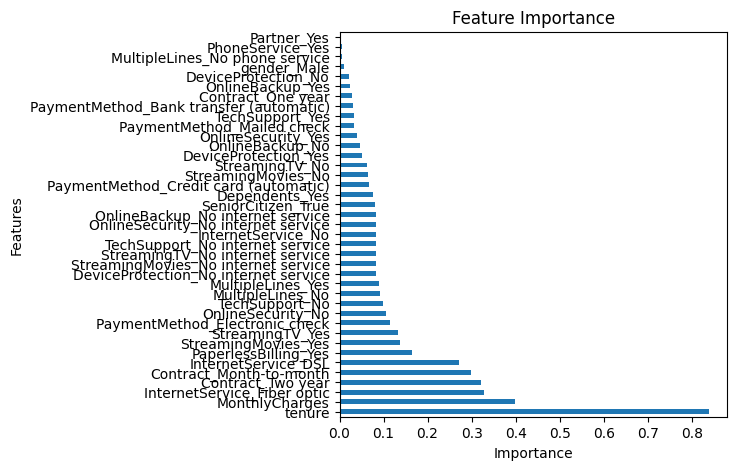

In [ ]:
#plotar feature sorted_feature_importance em gráfico de barras horizontais de forma descrescente
plt.figure(figsize=(5, 5))
sorted_feature_importance.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

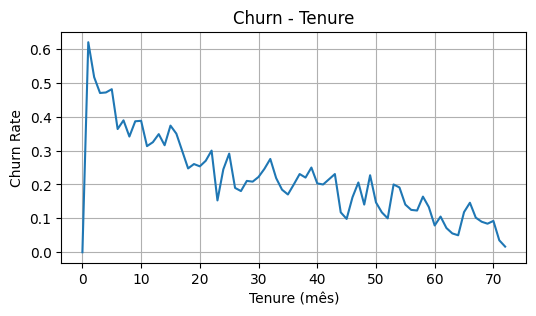

In [ ]:
# Gráfico Churn vs valores de tenure (tempo de permanência)
churn_by_tenure = df_telco_cust_encoded.groupby('tenure')['Churn_Yes'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_by_tenure = churn_by_tenure[1.0]

plt.figure(figsize=(6, 3))
churn_rate_by_tenure.plot()
plt.title('Churn - Tenure')
plt.xlabel('Tenure (mês)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()

# 10. Avaliação final, análise de erros e limitações

Analisando os modelos, o regressão logística foi o mais consistente em todos os cenários (base line, padronizado e normalizado). A pequena vantagem da versão normalizada (80,14%) é mínima, mas indica que a escala dos atributos pode ter dado um ajuste fino nos pesos do modelo.

Na etapa de otimização dos hiperparâmetros do algoritmo KNN os resultado não foram melhores do que a regressão logística (o melhor resultado foi com distância manhattan em 78,61% e 15 vizinhos).
Porém ao fazer tuning do algoritimo de regressão logística, a acurácia ganha uma pequena vantagem para 80,2% aplicando combinações de intensidade da regularização (C), tipo de penalização (l1 ou l2), sempre usando o solver liblinear, para encontrar o melhor ajuste do modelo.

Ao finalizar o modelo com conjunto de testes aplicando o modelo de **regressão logística**, a acurácia alcançou em 80,34% em dados não vistos. Esse resultado foi ainda melhor do que a avaliação anterior da regressão logística com normalização e hiperparâmetros.

Já na etapa de métricas de avaliação, observando a **Matriz de confusão** é verificado que dataset é desbalanceado. Sendo assim, a **acurácia sozinha não pode ser considerada**.

* Positivos reais = 928 + 107 = 1035 (73%)
* Negativos reais = 170 + 204 = 374 (27%)

Diante do cenário de desbalanceamento, outras métricas de avaliação foram consideradas:
**Precisão** que mede, dos que o modelo previu como positivos, quantos realmente eram positivos ficou em 84,5%.
**Recall** (Sensibilidade ou Revocação) mede, de todos os positivos reais, quantos o modelo conseguiu identificar ficou em 89,7%
**F1-Score** que é média harmônica entre precisão e recall. Usado quando precisa de equilíbrio entre precisão e recall, e quando as classes estão desbalanceadas.
Esta métrica de avaliação se mostra como ideal para este dataset, e ficou em 87,1%. Assim, vemos que o modelo está razoavelmente bom em acertar positivos sem exagerar nos falsos alarmes.

Também analisando a Matriz vimos que o modelo se saiu melhor ao identificar os casos da classe 0.0 ( "não churn"), com bons valores de precision, recall e f1-score. Já na classe 1.0 ("churn"), o desempenho foi mais fraco, com um f1-score de 60%, indicando que o modelo tem mais dificuldade para prever quem realmente vai sair.

De acordo com a curva ROC, o resultado foi positivo, pois a curva se posiciona acima e à esquerda da linha pontilhada, que representa o acaso. A área sob a curva (AUC) é uma métrica que avalia a capacidade do modelo em distinguir entre as classes. Um valor de AUC próximo de 1 indica excelente desempenho, enquanto valores próximos de 0 indicam desempenho ruim. Neste caso, o **AUC de 0,72** indica um desempenho aceitável.




## 11. Conclusões e próximos passos


A análise e o pré-processamento do dataset "Telco Customer Churn" evidenciam a importância de compreender a estrutura dos dados antes da etapa de modelagem.

Trata-se de um conjunto de dados limpo, com variáveis numéricas bem definidas, o que facilita a análise dos serviços contratados pelos clientes de uma operadora fictícia de telecomunicações.

A análise exploratória revelou informações interessantes com a utilização de ferramentas como a matriz de correlação, gráficos de barras, histogramas e boxplots onde identifiquei padrões de comportamento, serviços e fatores associados ao churn.

A engenharia de atributos foi comentada ao longo de todo notebook onde as etapas de feature selection, tranformação numérica (normalização e padronização) e transformação categórica (one-hot encoding) foram fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

Uma opção que poderia ter sido utilizada, seria a **técnica SMOTE (Synthetic Minority Over-sampling Technique)** para balancear o Dataset antes de treinar os modelos. Talvez com este cenário a acurácia pudesse ter sido a métrica principal.

E finalmente, das hipóteses levantadas no item 2 de Descrição do problema com a técnica de Feature importance conseguimos observar que o resultado mostra que as variáveis mais importantes para o modelo de classificação são **tempo de permanência (tenure)** em primeiríssimo lugar, valor mensal (MonthlyCharges) e Internet em fibra óptica(InternetService_Fiber optic) junto com Contrato de 2 anos (Contract_Two year). Já variáveis como gênero, parceria e serviço telefônico têm pouca influência no modelo.

Seria uma boa opção para a empresa ofertar serviços com recompensas para novo clientes permanecerem na base de clientes ou criarem ofertas atrativas de fidelização nesta operadora fictícia de telecomunicações.

Para trabalhos futuros em machine learning, recomenda-se avaliar um conjunto mais amplo de algoritmos além dos utilizados neste MVP (Regressão Logística, KNN, CART, Naive Bayes, SVM, Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting, Voting e XGBClassifier), explorando combinações mais variadas de hiperparâmetros, a fim de identificar possíveis ganhos adicionais de desempenho.